## Observations and Insights 

Analysis:

The study experiments on a similar amount of male and female mice which meand the study has adequate representation of subjects.

For the 1 mouse we analyzed taking Capomulin, it appears the drug was most effective at 35 days as the tumor was at its smallest during that time.

There's a strong, positive correlation between mouse weight and tumor volume for the Capomulin regimen.

In [14]:
%matplotlib notebook

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mergedata=pd.merge(mouse_metadata,study_results,on='Mouse ID')

# Display the data table for preview
mergedata.head()
# mergedata.dtypes


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice.
micecount=len(mergedata['Mouse ID'].unique())
micecount

249

In [17]:
# Create new dataframe from original
duplicate_df=mergedata

# Create New ID column that concatenates Mouse ID and Timepoint
concatenate1=duplicate_df['Mouse ID']+duplicate_df['Timepoint'].map(str)

# Add New ID column to dataframe
duplicate_df['New ID']=concatenate1
duplicate_df

# Find duplicate mouse ID
# Source: https://www.codegrepper.com/code-examples/delphi/how+to+find+duplicate+values+in+pandas+column
find_dupe = duplicate_df[duplicate_df.duplicated(subset=['New ID'],keep=False)]

In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
find_dupe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,New ID
908,g989,Propriva,Female,21,26,0,45.000000,0,g9890
909,g989,Propriva,Female,21,26,0,45.000000,0,g9890
910,g989,Propriva,Female,21,26,5,48.786801,0,g9895
911,g989,Propriva,Female,21,26,5,47.570392,0,g9895
912,g989,Propriva,Female,21,26,10,51.745156,0,g98910
913,g989,Propriva,Female,21,26,10,49.880528,0,g98910
914,g989,Propriva,Female,21,26,15,51.325852,1,g98915
915,g989,Propriva,Female,21,26,15,53.442020,0,g98915
916,g989,Propriva,Female,21,26,20,55.326122,1,g98920
917,g989,Propriva,Female,21,26,20,54.657650,1,g98920


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_frame=duplicate_df.drop(duplicate_df.loc[duplicate_df['Mouse ID'] == 'g989'].index)
print(clean_frame)

# Create new dataframe for clean data
clean_frame_master=pd.DataFrame(clean_frame)
clean_frame_master

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  New ID  
0              45.000000                 0   k4030  
1              38.825898                 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,New ID
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940


In [20]:
# Checking the number of mice in the clean DataFrame.
micecount2=len(clean_frame_master['Mouse ID'].unique())
micecount2

248

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

clean_frame_master.describe()

# Create new dataframe with only the columns I want
summary_stat=pd.DataFrame(clean_frame_master, columns=['Tumor Volume (mm3)','Drug Regimen'])
summary_stat


# Group new dataframe by Drug Regimen
group_summary = summary_stat.groupby(['Drug Regimen'])

# Calculate Totals
avgtumor=group_summary['Tumor Volume (mm3)'].mean()
mediantumor=group_summary['Tumor Volume (mm3)'].median()
variancetumor=group_summary['Tumor Volume (mm3)'].var()
stdtumor=group_summary['Tumor Volume (mm3)'].std()
semtumor=group_summary['Tumor Volume (mm3)'].sem()

# Create Summary Dataframe
summary_df=pd.DataFrame({'Avg Tumor Vol.':avgtumor,'Median Tumor Vol.':mediantumor,'Variance':variancetumor,'STD Dev':stdtumor,'SEM Tumor':semtumor})
summary_df

,Avg Tumor Vol.,Median Tumor Vol.,Variance,STD Dev,SEM Tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# Source: https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby

print(summary_stat.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem']))

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

<IPython.core.display.Javascript object>


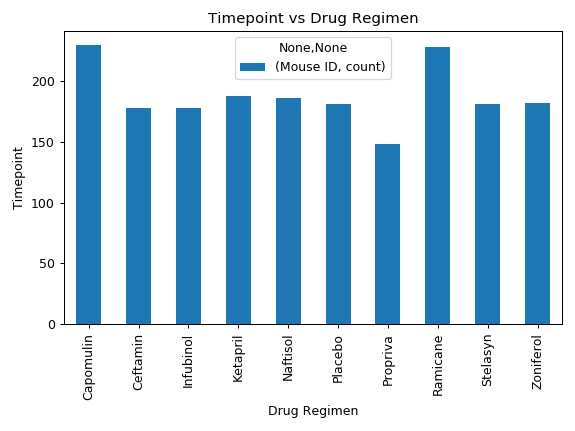

In [23]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# Use clean dataframe and pull only the columns I want to use
bar1=pd.DataFrame(clean_frame_master, columns=['Mouse ID','Drug Regimen'])

# Group new dataframe
bar2=bar1.groupby(['Drug Regimen']).agg(['count'])

# Plot data on bar graph
barplot1=bar2.plot(kind='bar',title='Timepoint vs Drug Regimen')
barplot1.set_xlabel('Drug Regimen')
barplot1.set_ylabel('Timepoint')
plt.show
plt.tight_layout()


<IPython.core.display.Javascript object>


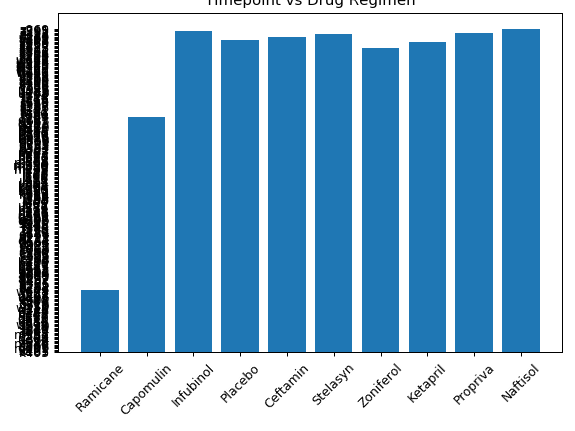

Text(0.5, 1, 'Timepoint vs Drug Regimen')

In [38]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

bar3=clean_frame_master['Drug Regimen']
bar4=clean_frame_master['Mouse ID']

bar3=bar3.values.tolist()

bar4=bar4.values.tolist()
x_axis=bar3
y_axis=bar4
plt.bar(x_axis,y_axis)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Timepoint vs Drug Regimen')

<IPython.core.display.Javascript object>


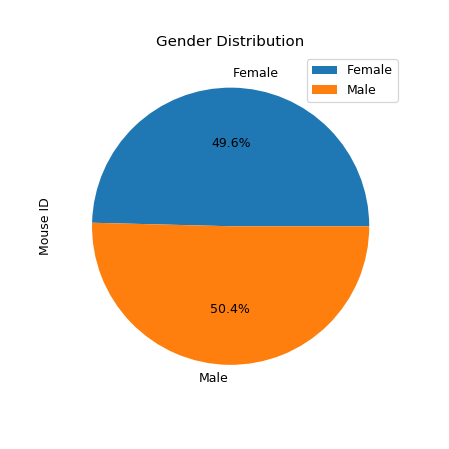

Text(0.5, 1.0, 'Gender Distribution')

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie1=pd.DataFrame(clean_frame_master, columns=['Mouse ID','Sex'])
piegroup=pie1.groupby('Sex')
piegroup=piegroup.agg({'Mouse ID':"nunique"})

pieplot=piegroup.plot.pie(y='Mouse ID',figsize=(5,5),autopct='%1.1f%%')
plt.title('Gender Distribution')

<IPython.core.display.Javascript object>


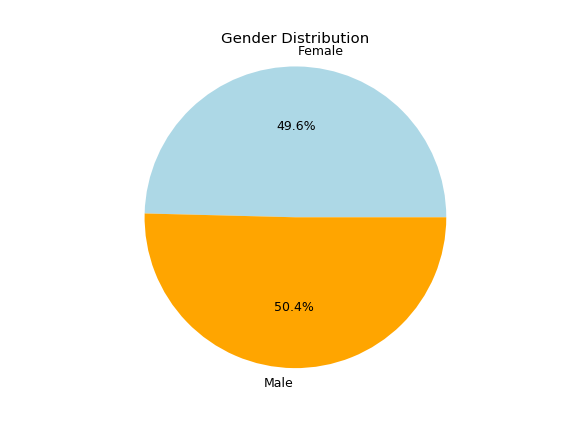

C:\Users\whall\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Creates data structure for needed pie graph
pie2=pd.DataFrame(clean_frame_master, columns=['Mouse ID','Sex'])
piegroup2=pie2.groupby('Sex')
piegroup2=piegroup2.agg({'Mouse ID':"nunique"})
pieindex2=piegroup2.index

# Creates pie graph and specifies colors
piecolors2=['lightblue','orange']
plt.pie(piegroup2,labels=pieindex2,autopct="%1.1f%%",colors=piecolors2,)
plt.axis("equal")
plt.title('Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxgroup=pd.DataFrame(clean_frame_master,columns=['Mouse ID','Timepoint','Tumor Volume (mm3)','Drug Regimen'])
groupmax=maxgroup.groupby('Mouse ID')
groupmax=groupmax.agg({'Timepoint':"max"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge=pd.merge(groupmax,clean_frame_master,on=('Mouse ID','Timepoint'))
finaltumorvolume=merge[['Mouse ID','Timepoint','Drug Regimen','Tumor Volume (mm3)']]
finaltumorvolume2=finaltumorvolume.loc[(finaltumorvolume['Drug Regimen']=='Capomulin')|(finaltumorvolume['Drug Regimen']=='Ramicane')|(finaltumorvolume['Drug Regimen']=='Infubinol')|(finaltumorvolume['Drug Regimen']=='Ceftamin')]
finaltumorvolume2
# finaltumorvolume2.style.hide_index()

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
3,a275,45,Ceftamin,62.999356
6,a411,45,Ramicane,38.407618
7,a444,45,Ramicane,43.047543
...,...,...,...,...
238,y769,45,Ceftamin,68.594745
239,y793,45,Capomulin,31.896238
240,y865,45,Ceftamin,64.729837
244,z578,45,Ramicane,30.638696


In [31]:
# Sort final tumor value df

finaltumorvolume3=finaltumorvolume2.sort_values(['Drug Regimen', 'Timepoint'])
finaltumorvolume3

capofinaltumorvolume=finaltumorvolume3.loc[(finaltumorvolume3['Drug Regimen']=='Capomulin')]
ceftafinaltumorvolume=finaltumorvolume3.loc[(finaltumorvolume3['Drug Regimen']=='Ceftamin')]
infufinaltumorvolume=finaltumorvolume3.loc[(finaltumorvolume3['Drug Regimen']=='Infubinol')]
ramifinaltumorvolume=finaltumorvolume3.loc[(finaltumorvolume3['Drug Regimen']=='Ramicane')]

# #################################################################################
capoquartile=capofinaltumorvolume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
capolowerq=capoquartile[0.25]
capoupperq=capoquartile[0.75]
capoiqr=capoupperq-capolowerq

capolowerb=capolowerq-(1.5*capoiqr)
capoupperb=capoupperq+(1.5*capoiqr)

capooutlier=capofinaltumorvolume.loc[(capofinaltumorvolume['Tumor Volume (mm3)']< capolowerb)|(capofinaltumorvolume['Tumor Volume (mm3)']>capoupperb)]

print('RESULTS FOR CAPOMULIN')
print(f"The lower quartile of tumor volume is: {capolowerq}")
print(f"The upper quartile of tumor volume is: {capoupperq}")
print(f"The interquartile range of tumor volume is: {capoiqr}")
print(f"The the median of tumor volume is: {capoquartile[0.5]} ")
print(f"Values below {capolowerb} could be outliers.")
print(f"Values above {capoupperb} could be outliers.")

# #################################################################################
ceftaquartile=ceftafinaltumorvolume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ceftalowerq=ceftaquartile[0.25]
ceftaupperq=ceftaquartile[0.75]
ceftaiqr=ceftaupperq-ceftalowerq

ceftalowerb=ceftalowerq-(1.5*ceftaiqr)
ceftaupperb=ceftaupperq+(1.5*ceftaiqr)

ceftaoutlier=ceftafinaltumorvolume.loc[(ceftafinaltumorvolume['Tumor Volume (mm3)']< ceftalowerb)|(ceftafinaltumorvolume['Tumor Volume (mm3)']>ceftaupperb)]

print('                                           ')
print('RESULTS FOR CEFTAMIN')
print(f"The lower quartile of tumor volume is: {ceftalowerq}")
print(f"The upper quartile of tumor volume is: {ceftaupperq}")
print(f"The interquartile range of tumor volume is: {ceftaiqr}")
print(f"The the median of tumor volume is: {ceftaquartile[0.5]} ")
print(f"Values below {ceftalowerb} could be outliers.")
print(f"Values above {ceftaupperb} could be outliers.")

# ###############################################################################
infuquartile=infufinaltumorvolume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
infulowerq=infuquartile[0.25]
infuupperq=infuquartile[0.75]
infuiqr=infuupperq-infulowerq

infulowerb=infulowerq-(1.5*infuiqr)
infuupperb=infuupperq+(1.5*infuiqr)

infuoutlier=infufinaltumorvolume.loc[(infufinaltumorvolume['Tumor Volume (mm3)']< infulowerb)|(infufinaltumorvolume['Tumor Volume (mm3)']>infuupperb)]

print('                                           ')
print('RESULTS FOR INFUBINOL')
print(f"The lower quartile of tumor volume is: {infulowerq}")
print(f"The upper quartile of tumor volume is: {infuupperq}")
print(f"The interquartile range of tumor volume is: {infuiqr}")
print(f"The the median of tumor volume is: {infuquartile[0.5]} ")
print(f"Values below {infulowerb} could be outliers.")
print(f"Values above {infuupperb} could be outliers.")


# ##############################################################################
ramiquartile=ramifinaltumorvolume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ramilowerq=ramiquartile[0.25]
ramiupperq=ramiquartile[0.75]
ramiiqr=ramiupperq-ramilowerq

ramilowerb=ramilowerq-(1.5*ramiiqr)
ramiupperb=ramiupperq+(1.5*ramiiqr)

ramioutlier=ramifinaltumorvolume.loc[(ramifinaltumorvolume['Tumor Volume (mm3)']< ramilowerb)|(ramifinaltumorvolume['Tumor Volume (mm3)']>ramiupperb)]

print('                                           ')
print('RESULTS FOR RAMICANE')
print(f"The lower quartile of tumor volume is: {ramilowerq}")
print(f"The upper quartile of tumor volume is: {ramiupperq}")
print(f"The interquartile range of tumor volume is: {ramiiqr}")
print(f"The the median of tumor volume is: {ramiquartile[0.5]} ")
print(f"Values below {ramilowerb} could be outliers.")
print(f"Values above {ramiupperb} could be outliers.")    

RESULTS FOR CAPOMULIN
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
                                           
RESULTS FOR CEFTAMIN
The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
                                           
RESULTS FOR INFUBINOL
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values b

<IPython.core.display.Javascript object>


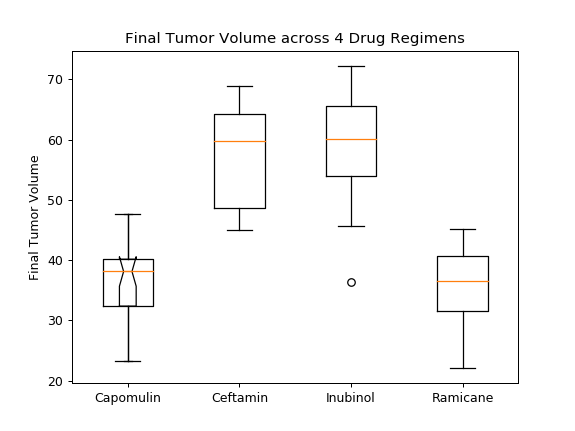

([<matplotlib.axis.XTick at 0x20850bc3c48>,
 <a list of 4 Text xticklabel objects>)

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

capotumor=capofinaltumorvolume['Tumor Volume (mm3)']
capo=capotumor.values.tolist()

ceftatumor=ceftafinaltumorvolume['Tumor Volume (mm3)']
cefta=ceftatumor.values.tolist()

infutumor=infufinaltumorvolume['Tumor Volume (mm3)']
infu=infutumor.values.tolist()

ramitumor=ramifinaltumorvolume['Tumor Volume (mm3)']
rami=ramitumor.values.tolist()

# Plot on same graph
# Source: https://stackoverflow.com/questions/27061137/plot-multiple-boxplot-in-one-graph-in-pandas-or-matplotlib
fig1,ax1=plt.subplots()
ax1.boxplot(capo,cefta)
plt.boxplot ([capo,cefta,infu,rami])
ax1.set_ylabel('Final Tumor Volume')
ax1.set_title('Final Tumor Volume across 4 Drug Regimens')
plt.xticks([1, 2, 3,4], ['Capomulin', 'Ceftamin', 'Inubinol','Ramicane'])


## Line and Scatter Plots

<IPython.core.display.Javascript object>


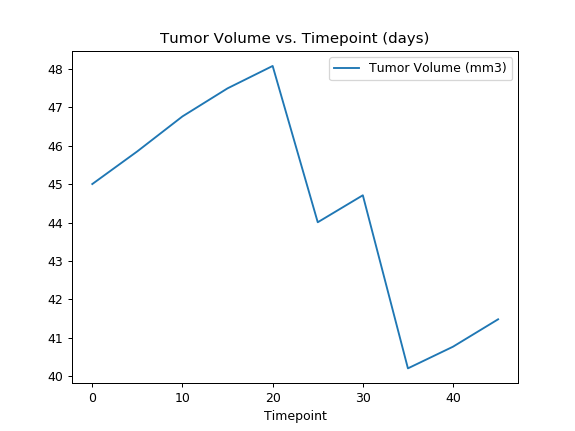

Text(0.5, 1.0, 'Tumor Volume vs. Timepoint (days)')

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Create data structure to identify mouse and associated tumor volumes and timepoints
linedata=clean_frame_master.loc[(clean_frame_master['Mouse ID']=='l509')]
linedata2=pd.DataFrame(linedata,columns=['Timepoint','Tumor Volume (mm3)'])
linedata2.style.hide_index()

# Plots line graph
lines=linedata2.plot.line(x='Timepoint',y='Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Timepoint (days)')

<IPython.core.display.Javascript object>


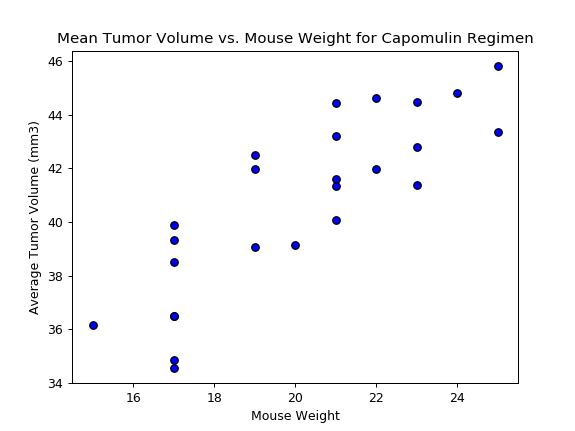

Text(0.5, 1.0, 'Mean Tumor Volume vs. Mouse Weight for Capomulin Regimen')

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Creates Data structure for scatter plot
capomulin=clean_frame_master.loc[(clean_frame_master['Drug Regimen']=='Capomulin')]
scatterdata=pd.DataFrame(capomulin,columns=['Tumor Volume (mm3)','Weight (g)','Mouse ID'])
scatterdatagroup=scatterdata.groupby('Mouse ID')
scatterdatagroup.agg({'Weight (g)':'max','Tumor Volume (mm3)':'mean'})
weight=scatterdatagroup['Weight (g)'].max()
avgtumor=scatterdatagroup['Tumor Volume (mm3)'].mean()

# Creates scatter plot
plt.scatter(weight,avgtumor,marker='o',facecolors='blue',edgecolors='black')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mean Tumor Volume vs. Mouse Weight for Capomulin Regimen')


## Correlation and Regression

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(weight,avgtumor)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


<IPython.core.display.Javascript object>


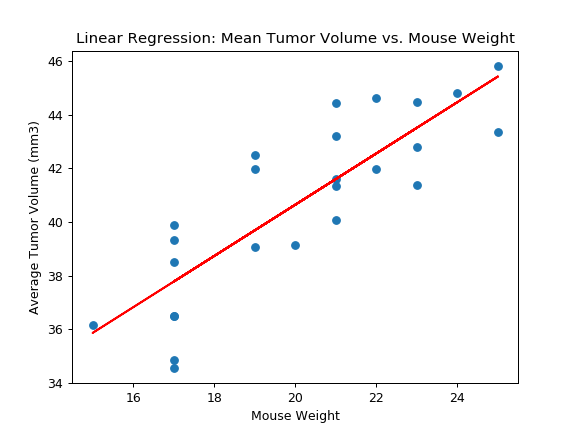

Text(0.5, 1.0, 'Linear Regression: Mean Tumor Volume vs. Mouse Weight')

In [36]:
# Plots linear regression equation and plot along with scatter plot
x_values=weight
y_values=avgtumor
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= " +str(round(slope,2))+"x + "+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
plt.title('Linear Regression: Mean Tumor Volume vs. Mouse Weight')